## HW02: Exploratory Data Analysis (Part 01)

This is Assignment 02 for the course "Introduction to Data Science" at the Faculty of Information Technology, University of Science, Vietnam National University, Ho Chi Minh City.

---

(Latest update: 26/10/2024)

Student Name: Võ Hùng Khoa

Student ID: 22127202

---

## **How to Complete and Submit the Assignment**

&#9889; **Note**: You should follow the instructions below. If anything is unclear, you need to contact the teaching assistant or instructor immediately for timely support.

**How to Do the Assignment**

You will work directly on this notebook file. First, fill in your full name and student ID (MSSV) in the header section of the file above. In the file, complete the tasks in sections marked:
```python
# YOUR CODE HERE
raise NotImplementedError()
```
Or for optional code sections:
```python
# YOUR CODE HERE (OPTION)
```
For markdown cells, complete the answer in the section marked:
```markdown
YOUR ANSWER HERE
```

**How to Submit the Assignment**

Before submitting, select `Kernel` -> `Restart Kernel & Run All Cells` if you are using a local environment, or `Runtime -> Restart session` and run all if using Google Colab, to ensure everything works as expected.

Next, create a submission folder with the following structure:
- Folder named `MSSV` (for example, if your student ID is `1234567`, name the folder `1234567`)
    - File `HW02.ipynb` (no need to submit other files)

Finally, compress this `MSSV` folder in `.zip` format (not `.rar` or any other format) and submit it via the link on Moodle.\
<font color=red>Please make sure to strictly follow this submission guideline.</font>

---

## Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

---

## Data collecting

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult: http://www.vinhoverde.pt/en/ or the reference [Cortez et al., 2009].  Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.). You can download these data from this [link](https://archive.ics.uci.edu/dataset/186/wine+quality).

These datasets can be viewed as classification or regression tasks.  The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

---

## Exploring your data

### Read raw data from file (0.25 points)

In [2]:
# YOUR CODE HERE
# raise NotImplementedError()
raw_white = pd.read_csv("data/winequality-white.csv", sep=";")
raw_red = pd.read_csv("data/winequality-red.csv", sep=";")


In [3]:
# TEST 1
raw_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
# TEST 2
raw_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Combine the two dataframes and add a `colors` column to distinguish between red and white wines. Named the dataframe as `raw_df`.

In [5]:
raw_white["colors"] = "white"
raw_red["colors"] = "red"
raw_df = pd.concat([raw_white, raw_red], ignore_index=True)

### How many rows and how many columns does the raw data have? (0.25 points)

Next, you calculate the number of rows and columns of two DataFrames `raw_white` and `raw_red`. Then, store it in the variable `shape_white` and `shape_red`(tuple). 

In [6]:
# YOUR CODE HERE
# raise NotImplementedError()
shape_white = raw_white.shape
shape_red = raw_red.shape
shape = raw_df.shape

In [7]:
# TEST
assert shape_white == (4898, 13)
assert shape_red == (1599, 13)
assert shape == (6497, 13)

### What does each line mean? Does it matter if the lines have different meanings?

**What does each line mean?**  
Each line represents a single wine sample, containing its physicochemical properties (input variables) and the sensory quality score (output variable).  


**Does it matter if the lines have different meanings?**  
Yes, consistency in the meaning of lines is crucial. If the lines represent different contexts (e.g., varying wine types or evaluation methods), the model's predictions may become inaccurate due to mixed data patterns.

### Does the raw data have duplicate rows? (0.25 points)

Next, you calculate the number of rows with duplicate indexes and store it in the variable `red_num_duplicated_rows` and `white_num_duplicated_rows`. In a group of lines with the same index, the first line is not counted as repeated.

In [8]:
# YOUR CODE HERE
# raise NotImplementedError()
# calculate the number of rows with duplicate indexes and store it in the variable `red_num_duplicated_rows` and `white_num_duplicated_rows In a group of lines with the same index, the first line is not counted as repeated. 

# Count duplicate rows by index for red wine data
red_num_duplicated_rows = raw_red.duplicated(keep='first').sum()

# Count duplicate rows by index for white wine data
white_num_duplicated_rows = raw_white.duplicated(keep='first').sum()


In [9]:
# TEST
assert white_num_duplicated_rows == 937
assert red_num_duplicated_rows == 240

In [10]:
raw_red.drop_duplicates(keep=False, inplace=True)
raw_white.drop_duplicates(keep=False, inplace=True)
raw_df.drop_duplicates(keep=False, inplace=True)

### What does each column mean? (0.25đ)

Read file `winequality.names` and indentify what's type (numerical/ categorical; continous/ discrete; ordinal/ nominal) for each attributes in the dataset.

<center>

| **Variable**            | **Type**                   |
|--------------------------|----------------------------|
| Fixed acidity            | Numerical, Continuous     |
| Volatile acidity         | Numerical, Continuous     |
| Citric acid              | Numerical, Continuous     |
| Residual sugar           | Numerical, Continuous     |
| Chlorides                | Numerical, Continuous     |
| Free sulfur dioxide      | Numerical, Discrete       |
| Total sulfur dioxide     | Numerical, Discrete       |
| Density                  | Numerical, Continuous     |
| pH                       | Numerical, Continuous     |
| Sulphates                | Numerical, Continuous     |
| Alcohol                  | Numerical, Continuous     |
| Quality                  | Categorical, Ordinal      |
| Color                    | Categorical, Nominal      |

<center>

### What data type does each column currently have? Are there any columns whose data types are not suitable for further processing? (0.25 points)

Next, you calculate the data type (dtype) of each column in DataFrame `raw_white` and save the result into Series `white_dtypes` (This Series has the index as the column name). Do similar for `raw_red`.

In [11]:
# YOUR CODE HERE
# raise NotImplementedError()
white_dtypes = raw_white.dtypes
red_dtypes = raw_red.dtypes

In [12]:
# TEST 1
white_dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
colors                   object
dtype: object

In [13]:
# TEST 2
red_dtypes

# We can see that quality column is not suitable type, it should be in categorical type 

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
colors                   object
dtype: object

As we can see that the quality column is not suitable type, it should be in categorical type 

### For each column with numeric data type, how are the values distributed? (1đ)

For columns with numeric data types, you will calculate:
- Percentage (from 0 to 100) of missing values
- The min
- The lower quartile (phân vị 25)
- The median (phân vị 50)
- The upper quartile (phân vị 75)
- The max

You will save the results to a DataFrame `num_col_info_red` and `num_col_info_white`, where:
- The names of the columns are the names of the numeric columns in `raw_red` and `raw_white`
- Names of rows: "missing_ratio", "min", "lower_quartile", "median", "upper_quartile", "max"  

For ease of viewing, you round all values to 1 decimal place using the `.round(1)` method.

In [14]:
# YOUR CODE HERE
# raise NotImplementedError()
# def calculate_numeric_stats(df):

#     stats = {
#         # Calculate the missing ratio of the numeric columns
#         "missing_ratio": df.isnull().mean() * 100,

#         # Calculate the min of the numeric columns
#         "min": df.min(),

#         # Calculate the lower_quartile of the numeric columns
#         "lower_quartile": df.quantile(0.25),

#         # Calculate the median of the numeric columns
#         "median": df.median(),

#         # Calculate the upper_quartile of the numberic columns
#         "upper_quartitle": df.quantile(0.75),

#         # Calculate the max of the numeric columns
#         "max": df.max()
#     }
#     return pd.DataFrame(stats).round(1).transpose()
    
# # Calculate the numeric statistics for the given DataFrame
# num_col_info_red = calculate_numeric_stats(raw_red.select_dtypes(include=[np.number]))
# num_col_info_white = calculate_numeric_stats(raw_white.select_dtypes(include=[np.number]))

# # Rename the columns to make them more descriptive
# num_col_info_red.columns = raw_red.select_dtypes(include=[np.number]).columns
# num_col_info_white.columns = raw_white.select_dtypes(include=[np.number]).columns


# Define some statistical functions
def missing_ratio(series):
    return series.isnull().mean()*100

def lower_quartile(series):
    return series.quantile(0.25)

def median(series):
    return series.median()

def upper_quartile(series):
    return series.quantile(0.75)

num_col_info_red = raw_red.select_dtypes(include=[np.number])
num_col_info_white = raw_white.select_dtypes(include=[np.number])


# Em nghĩ đề nên là tạo các hàm cần thiết missing_ratio, lower_quartile, median, upper_quartile để tính các thống kê thì sẽ dễ hiểu hơn ạ


In [15]:
# TEST
num_col_info_red = num_col_info_red.agg([missing_ratio, "min", lower_quartile, median, upper_quartile, "max"])
num_col_info_white = num_col_info_white.agg([missing_ratio, "min", lower_quartile, median, upper_quartile, "max"])

num_col_info_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
missing_ratio,0.0,0.000,0.00,0.0,0.000,0.0,0.0,0.00000,0.00,0.00,0.0,0.0
min,3.8,0.085,0.00,0.7,0.009,2.0,9.0,0.98711,2.72,0.22,8.0,3.0
lower_quartile,6.2,0.210,0.27,1.6,0.035,22.0,105.0,0.99150,3.10,0.41,9.6,5.0
median,6.7,0.260,0.32,4.2,0.042,32.0,131.0,0.99331,3.19,0.48,10.5,6.0
upper_quartile,7.3,0.330,0.39,8.2,0.050,45.0,166.0,0.99540,3.30,0.56,11.5,6.0
max,14.2,1.100,1.66,65.8,0.346,289.0,440.0,1.03898,3.82,1.08,14.2,9.0


### For each column with a non-numeric data type, how are the values distributed?(1đ)

For columns with non-numeric data types, you calculate:
- Percentage (from 0 to 100) of missing values
- Number of values (the values here are different values and we do not consider missing values): with columns whose type is categorical, it is a set with a finite number of categories. Directly counting the number of values in these columns doesn't make much sense, so it's better to count the number of elements of all types.
- The percentage (from 0 to 100) of each value is sorted by decreasing percentage (we do not consider missing values, the ratio is the ratio compared to the number of non-missing values): you use a dictionary to store , key is the value, value is the percentage; With the column corresponding to each type, the method is similar to above.

You will save the results to DataFrame `cat_col_info_df`, where:
- The names of the columns are the names of the non-numeric columns in `raw_df`
- The names of the lines are: "missing_ratio", "num_values", "value_ratios"

For ease of viewing, you round all values to 1 decimal place using the `.round(1)` method.

In [16]:
# YOUR CODE HERE
# raise NotImplementedError()
# def calculate_nonnumeric_stats(df):
#     df = df.copy()

#     stats = {
#         # Calculate the missing ratio of the numeric columns
#         "missing_ratio": df.isnull().mean() * 100,

#         # Calculate the min of the numeric columns
#         "num_values": df.dropna().nunique(),

#         # Calculate the ...    
#         "value_ratios": df.apply(lambda col: (col.value_counts(normalize=True, dropna=True) * 100)
#                                  .round(1).sort_values(ascending=False).to_dict())
#     }
#     return pd.DataFrame(stats).round(1).transpose()

# cat_col_info_df = calculate_nonnumeric_stats(raw_df.select_dtypes(exclude=np.number))

# Define some functions to test
def num_values(series):
    return series.nunique(dropna=True)

def value_ratios(series):
    data = series.value_counts(normalize=True, dropna=True) * 100
    return data.round(1).to_dict()

cat_col_info_df = raw_df.select_dtypes(exclude=np.number)




# Em nghĩ đề bài nên là định nghĩa các hàm 'num_values', 'value_ratios' để tạo ra dataFrame cat_col_info_df theo cấu trúc của đề thì sẽ dễ hiểu hơn ạ


In [17]:
# TEST
cat_col_info_df = cat_col_info_df.agg([missing_ratio, num_values, value_ratios])
cat_col_info_df

,colors
missing_ratio,0.0
num_values,2
value_ratios,"{'white': 73.7, 'red': 26.3}"


## Exploring your data (Cont)

### Task 01: Analyzing wine quality via histogram.

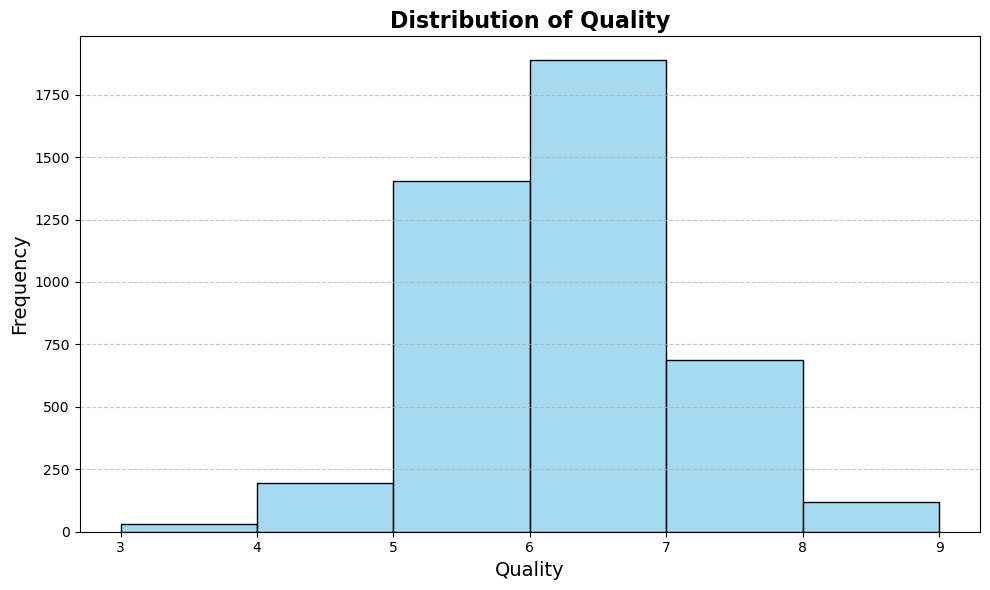

In [18]:
# YOUR CODE HERE
# raise NotImplementedError()

# Create figure
plt.figure(figsize=(10, 6))

# Create histogram
sns.histplot(
    raw_df["quality"], 
    bins=6,        
    color="skyblue",  
    edgecolor="black" 
)

# Add label and titel
plt.title("Distribution of Quality", fontsize=16, fontweight='bold')
plt.xlabel("Quality", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

# Draw grid
plt.grid(axis='y', linestyle='--', alpha=0.7)


# Display the graph
plt.tight_layout()
plt.show()

### Task 02: Aanalyzing acidity in red and white wine.

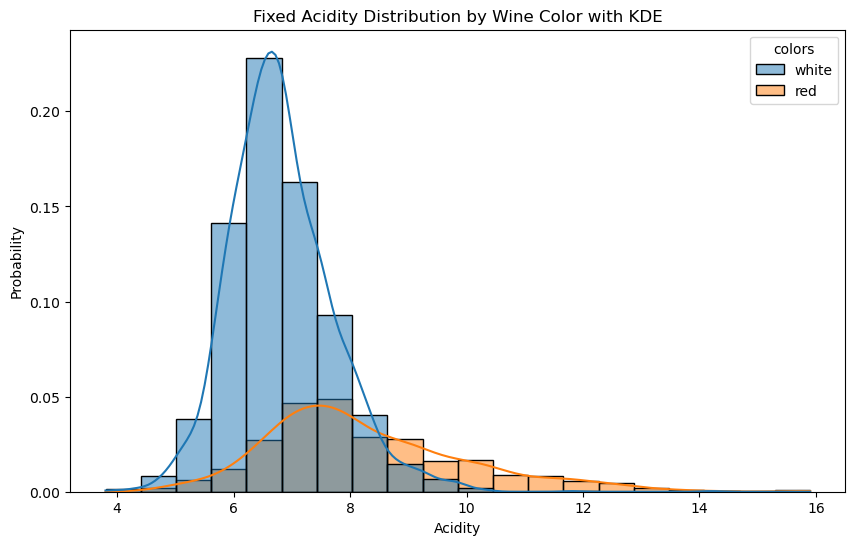

In [19]:
# YOUR CODE HERE
# raise NotImplementedError()

# Create a figure with a size of (10, 6)
plt.figure(figsize=(10, 6))

# Draw Histogram with KDE
sns.histplot(data=raw_df, x='fixed acidity', hue='colors', kde=True, bins=20, stat='probability')
plt.title('Fixed Acidity Distribution by Wine Color with KDE')
plt.xlabel('Acidity')
plt.ylabel('Probability')
plt.show()


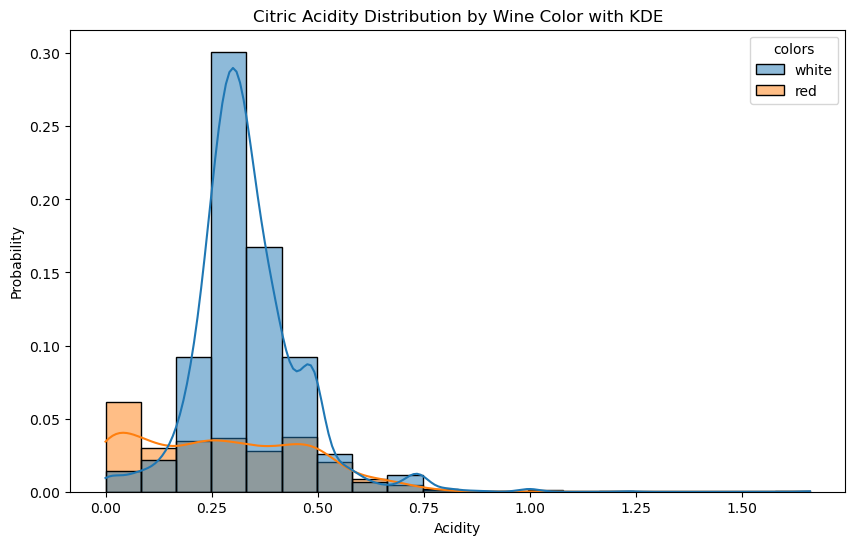

In [20]:
# YOUR CODE HERE
# raise NotImplementedError()
# Create a figure with a size of (10, 6)
plt.figure(figsize=(10, 6))

# Draw Histogram with KDE
sns.histplot(data=raw_df, x='citric acid', hue='colors', kde=True, bins=20, stat='probability')
plt.title('Citric Acidity Distribution by Wine Color with KDE')
plt.xlabel('Acidity')
plt.ylabel('Probability')
plt.show()

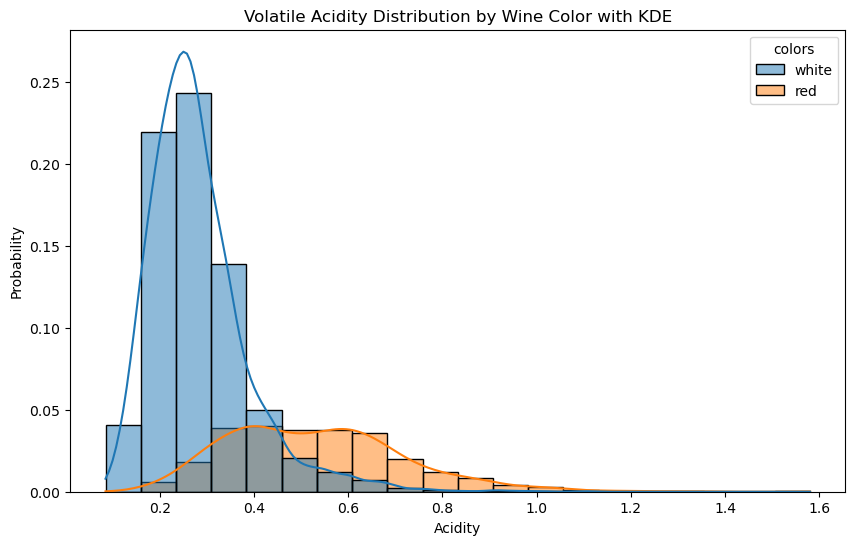

In [21]:
# YOUR CODE HERE
# raise NotImplementedError()
# Create a figure with a size of (10, 6)
plt.figure(figsize=(10, 6))
 
# Draw Histogram with KDE
sns.histplot(data=raw_df, x='volatile acidity', hue='colors', kde=True, bins=20, stat='probability')
plt.title('Volatile Acidity Distribution by Wine Color with KDE')
plt.xlabel('Acidity')
plt.ylabel('Probability')
plt.show()

### Task 03: Analyzing sulfur dioxide for each type of wines. Try to focus on the ratio of free and total sulfur.

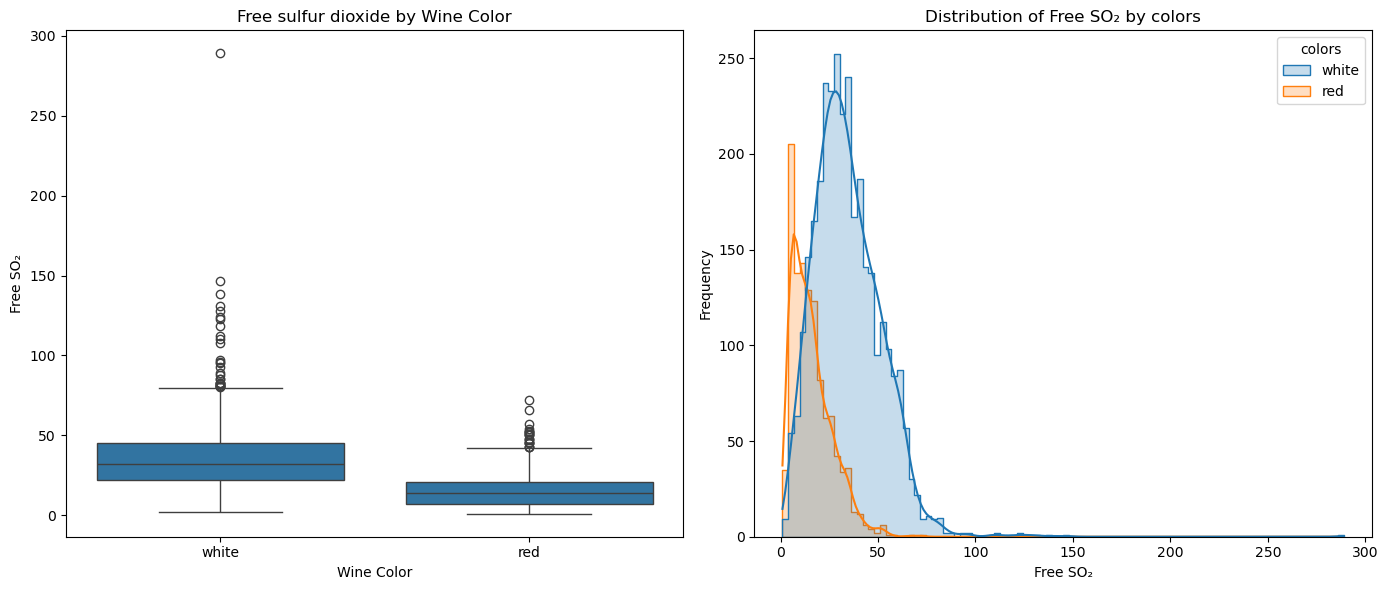

In [29]:
# YOUR CODE HERE
# raise NotImplementedError()

# Create a figure and two subplot
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot on the first subplot
sns.boxplot(data=raw_df, x='colors', y='free sulfur dioxide', ax=axes[0])
axes[0].set_title('The boxplot of the Free SO₂ by Wine Color')
axes[0].set_xlabel('Wine Color')
axes[0].set_ylabel('Free SO₂')

# Histogram on the second subplot
sns.histplot(data=raw_df, x='free sulfur dioxide', hue='colors', kde=True, element='step', ax=axes[1])
axes[1].set_title('Distribution of Free SO₂ by colors')
axes[1].set_xlabel('Free SO₂')
axes[1].set_ylabel('Frequency')

# Adjust the layout to ensure plots do not overlap
plt.tight_layout()

# Display
plt.show()

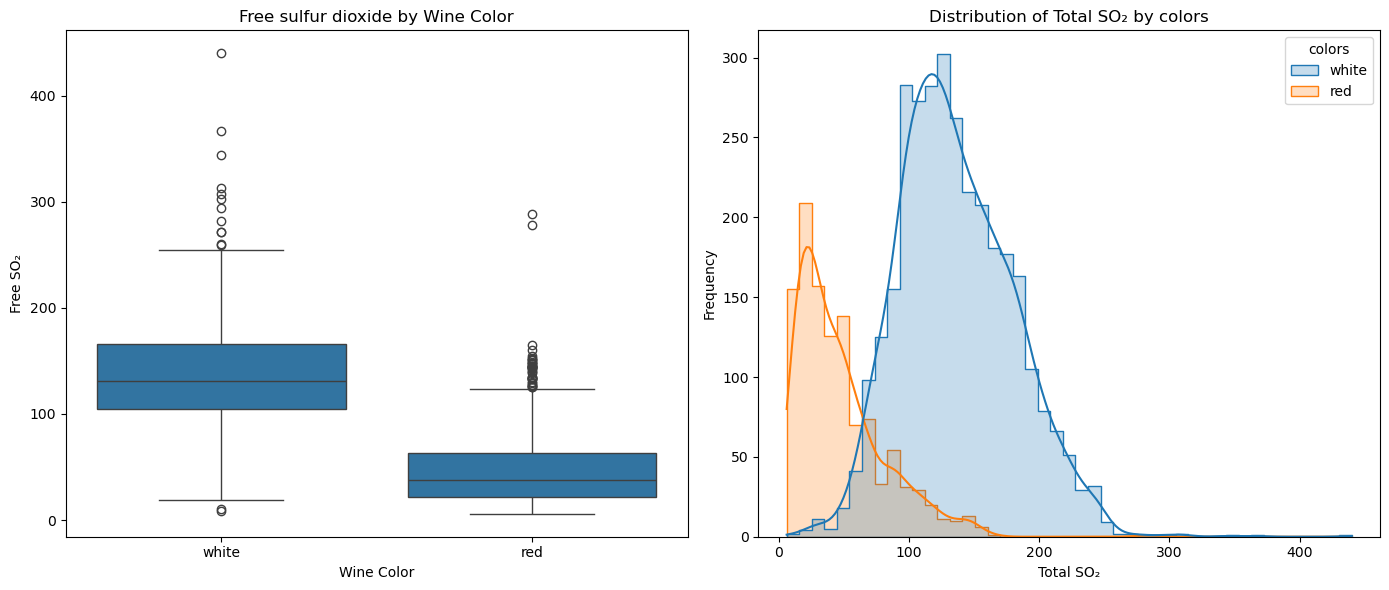

In [ ]:
# YOUR CODE HERE
# raise NotImplementedError()

# Create a figure and two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot on the first subplot
sns.boxplot(data=raw_df, x='colors', y='total sulfur dioxide', ax=axes[0])
axes[0].set_title('The boxplot of the Total SO₂ by Wine Color')
axes[0].set_xlabel('Wine Color')
axes[0].set_ylabel('Free SO₂')

# Histogram on the second subplot
sns.histplot(data=raw_df, x='total sulfur dioxide', hue='colors', kde=True, element='step', ax=axes[1])
axes[1].set_title('Distribution of Total SO₂ by colors')
axes[1].set_xlabel('Total SO₂')
axes[1].set_ylabel('Frequency')

# Adjust the layout so plots do not overlap
plt.tight_layout()

# Display the figure
plt.show()

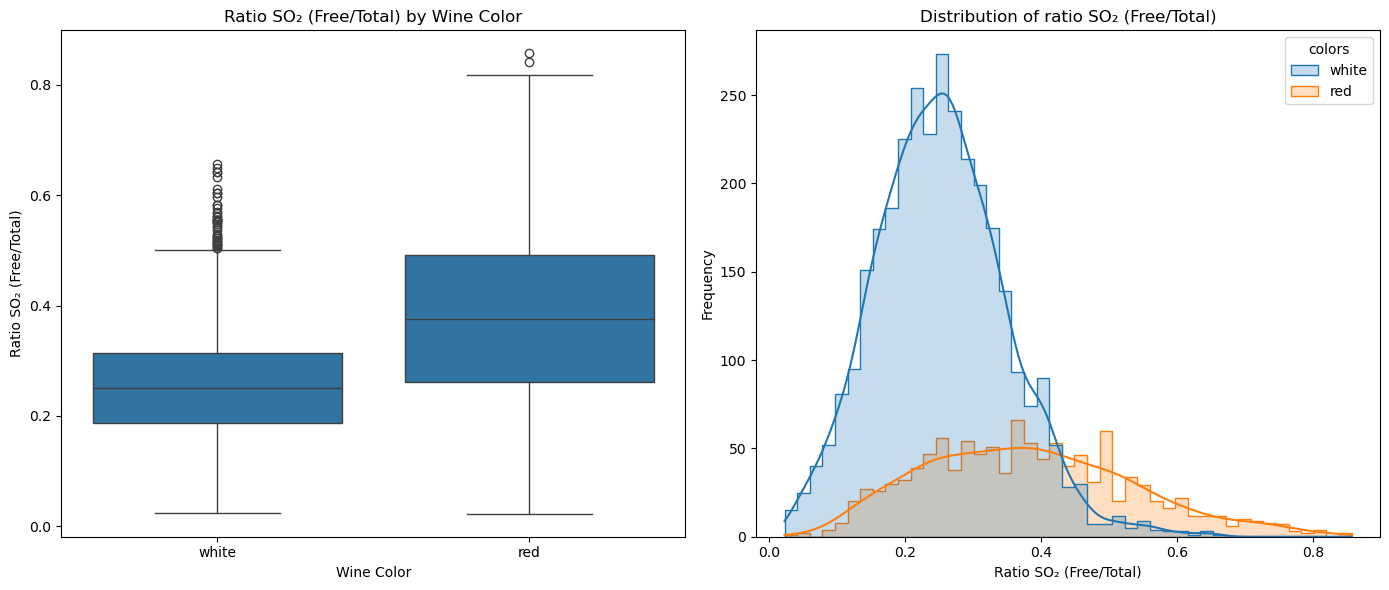

In [ ]:
# YOUR CODE HERE
# raise NotImplementedError()
# There are some thing to be clear here:
# Free Sulfur Dioxide mean: The amount of SO₂ that is unbound and exists in a dissolved gaseous
# form in wine and this is the active portion responsible for protecting the wine.
# The total amount of SO₂ mean: both the free SO₂ and the bound SO₂. The bound portion consists
# of SO₂ that has combined with other components in the wine (e.g., sugars or aldehydes).
# Therefore, the Ratio (Free/Total SO₂): Indicates the efficiency of SO₂ in protecting the wine.
# A higher ratio means better preservation, as free SO₂ is the primary protective component.
# Because of these reasons, we gonna create a column that includes the ratio (Free/Total SO2)

# First we make a copy of raw_df
raw_df_copy = raw_df.copy()

# Then we calculate the ratio (Free/Total SO2)
raw_df_copy['ratio'] = raw_df_copy['free sulfur dioxide'] / raw_df_copy['total sulfur dioxide']
# raw_df_copy.head()

# Create figure and two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot on the first subplot
sns.boxplot(data=raw_df_copy, x='colors', y='ratio', ax=axes[0])
axes[0].set_title('The boxplot of the Ratio SO₂ (Free/Total) by Wine Color')
axes[0].set_xlabel('Wine Color')
axes[0].set_ylabel('Ratio SO₂ (Free/Total)')

# Histogram on the second subplot 
sns.histplot(data=raw_df_copy, x='ratio', hue='colors', kde=True, element='step', ax=axes[1])
axes[1].set_title('Distribution of ratio SO₂ (Free/Total)')
axes[1].set_xlabel('Ratio SO₂ (Free/Total)')
axes[1].set_ylabel('Frequency')

# Adjust the layout
plt.tight_layout()

# Display
plt.show()

### Task 04: What about the residual sugar? How does it affect wine quality?

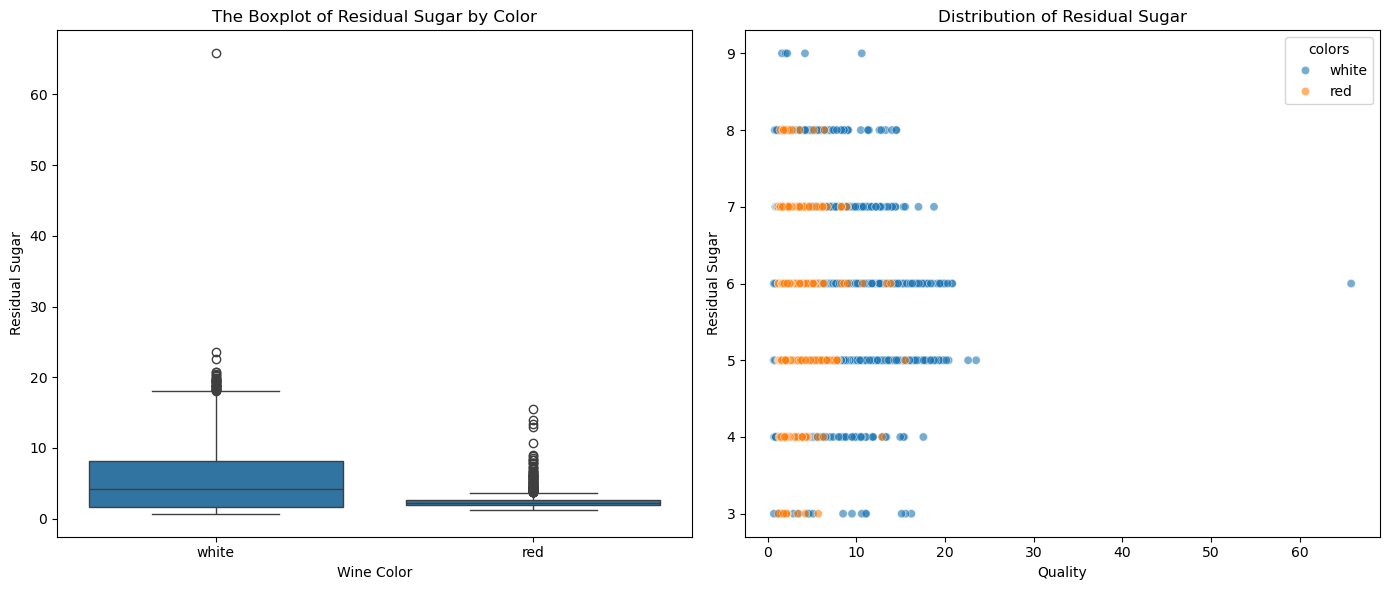

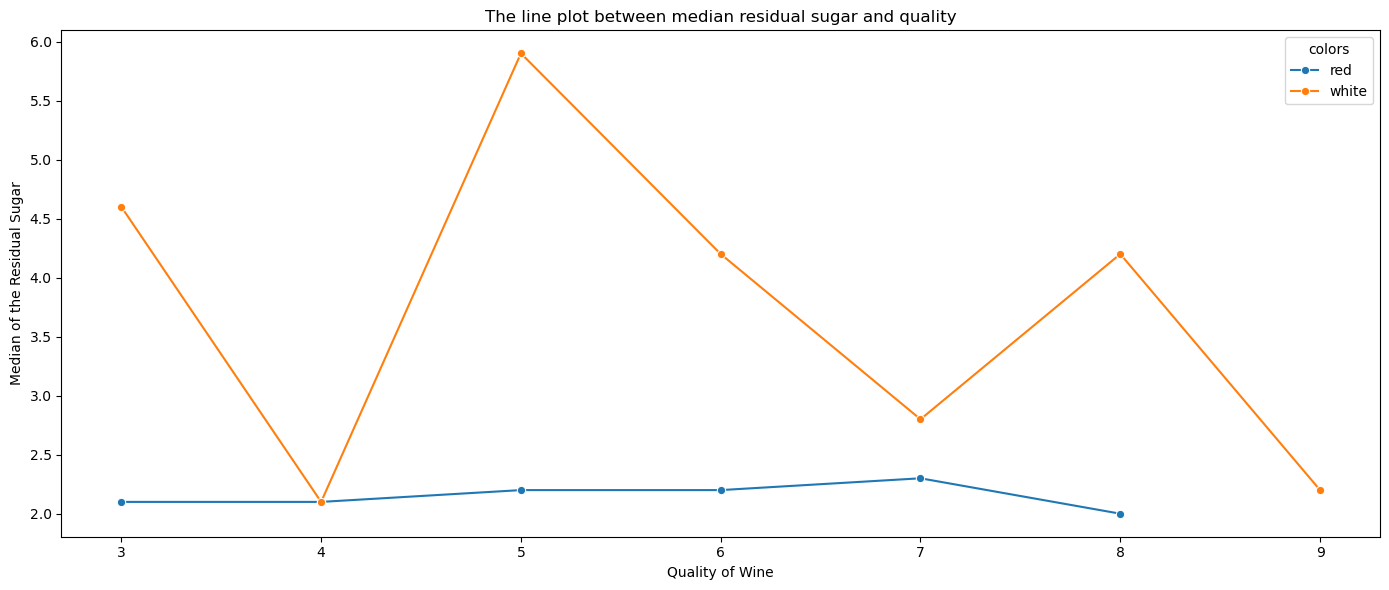

The statistic of the residual sugar and quality:
                min  median    max
colors quality                    
red    3        1.2     2.1   5.70
       4        1.3     2.1  12.90
       5        1.2     2.2  15.50
       6        1.2     2.2  13.90
       7        1.2     2.3   8.90
       8        1.4     2.0   6.40
white  3        0.7     4.6  16.20
       4        0.7     2.1  17.55
       5        0.7     5.9  23.50
       6        0.7     4.2  65.80
       7        0.9     2.8  18.75
       8        0.8     4.2  14.50
       9        1.6     2.2  10.60
Correlation between Quality and Residual Sugar: -0.06


In [100]:
# YOUR CODE HERE
# raise NotImplementedError()
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot on the first subplot
sns.boxplot(data=raw_df, x='colors', y='residual sugar', ax=axes[0])
axes[0].set_title("The Boxplot of Residual Sugar by Color")
axes[0].set_xlabel("Wine Color")
axes[0].set_ylabel("Residual Sugar")

# Histogram on the second subplot 
sns.scatterplot(data=raw_df, x='residual sugar', y='quality', hue='colors', ax=axes[1], alpha=0.6)
# sns.regplot(data=raw_df[raw_df['colors'] == 'red'], x='residual sugar', y='quality', scatter=False, color='red', label='Trend (Red Wine)')
# sns.regplot(data=raw_df[raw_df['colors'] == 'white'], x='residual sugar', y='quality', scatter=False, color='blue', label='Trend (White Wine)')
axes[1].set_title('Distribution of Residual Sugar')
axes[1].set_xlabel('Quality')
axes[1].set_ylabel('Residual Sugar')

# Adjust the layout
plt.tight_layout()

# Display
plt.show()

# Prepare the data for the visualizing
lineplot_data = raw_df_copy.groupby(["colors", "quality"])["residual sugar"].agg(["min","median", "max"])

# Draw the line plot between median residual sugar and quality
plt.figure(figsize=(14, 6))
sns.lineplot(data=lineplot_data.reset_index(), x="quality", y="median", hue='colors', markers=True, dashes=False, marker='o')
plt.xlabel("Quality of Wine")
plt.ylabel("Median of the Residual Sugar")
plt.title("The line plot between median residual sugar and quality")
plt.tight_layout()
plt.show()

# Print the statistics data
print("The statistic of the residual sugar and quality:")
print(lineplot_data)

# Tính chỉ số tương quan giữa quality và residual sugar
correlation = raw_df['quality'].corr(raw_df['residual sugar'])

# In kết quả
print(f"Correlation between Quality and Residual Sugar: {correlation:.2f}")

# Comment: There appears to be no significant relationship between residual sugar and wine quality.


### Task 05: Alcohol plays a vital role in wine production. How does it affect wine quality?

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

### Task 06: For each type of wine, how is density distributed? Is it importance to wine quality?

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

### Task 07: How are Chloride characteristics distributed in these two types of wines? 

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

## Analyze the correlation between two or more variables

### Task 08: Correlation matrix analysis

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

### Analysis of the influence of variables on wine quality

#### Task 09: Investigating the relationship between `Density` and `Quality`

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

#### Task 10: Investigating the relationship between `Alcohol` and `Quality`

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

#### Task 11: Investigating the relationship between `Chlorides` and `Quality`

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

#### Task 12: Investigating the relationship between `Volatile Acidity` and `Quality`

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

#### Task 13: Investigation of the relationship between total SO2 and residual sugar after fermentation

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

#### Task 14: Investigation of the impact of alcohol concentration and sugar content on alcohol density

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

### Analysis based on wine color

#### Task 15: Analyze the relationship between color and density of wine

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

#### Task 16: Analyze the relationship between color and residual sugar after fermentation

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

#### Task 17: Analyze the relationship between color and total sulfur content in wine

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

#### Task 18: Analyze the relationship between color and free sulfur content in wine

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

#### Task 19: Analyze the relationship between color and acidity of wine

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

### Correlation analysis between variables based on color

#### Task 20: Investigate the correlation between density and wine quality based on color

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

#### Task 21: Investigate the correlation between alcohol concentration and wine quality based on color

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

#### Task 22: Investigate the correlation between salt content and wine quality based on color

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

#### Task 23: Investigate the correlation between acidity and wine quality based on color

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

### Multi-attributes analysis

#### Task 24: Chlorides and Sulphates on wine quality

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

#### Task 25: Sulfur Dioxide Ratio and Volatile Acidity Ratio on wine quality

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

#### Task 26: Volatile Acidity and Alcohol on wine quality

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

### Main Factors Influencing Wine Quality

Based on the above analysis, you should decide what factors affect wine quality.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()